In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ISLP.models import ModelSpec
import statsmodels.api as sm

In [3]:
rng = np.random.default_rng(1) # Random Number Generator with seed=1
x = rng.normal(size=100)
eps = rng.normal(scale=0.25, size=100)

In [9]:
y = -1 + 0.5*x + eps
print('Length of y:', y.size)

Length of y: 100


The values for $\beta_0$ and $\beta_1$ according to the equation $Y=\beta_0 + \beta_1 X + \epsilon$ are:

* $\beta_0 = -1$
* $\beta_1 = 0.5$

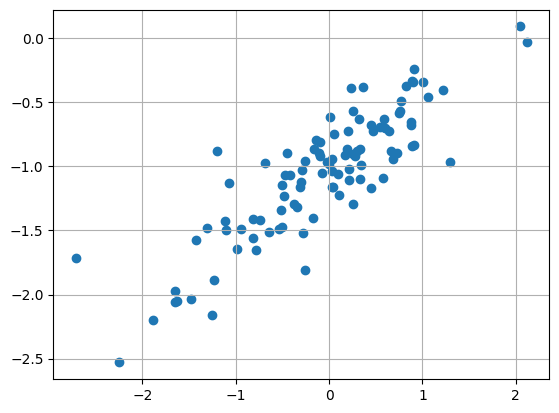

In [12]:
plt.scatter(x, y)
plt.grid()

In [17]:
# Predict y using x
X = pd.DataFrame({
    'x': x
})

design = ModelSpec(['x'])
X = design.fit_transform(X)

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           1.74e-30
Time:                        11:19:19   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0190      0.025    -40.537      0.000      -1.069      -0.969
x              0.4921      0.029     16.734      0.000       0.434       0.551
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
intercept, slope = results.params
print(intercept, slope)

-1.0190063887490803 0.49214550728875883


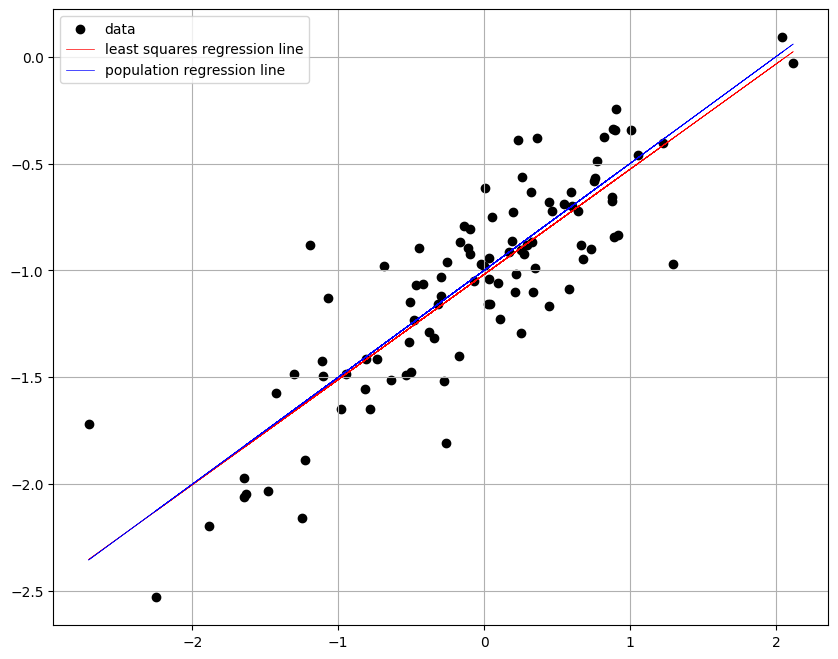

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(x, y, c='k', label='data')
plt.plot(x, intercept + slope*x, c='r', linewidth=0.5, label='least squares regression line')
plt.plot(x, -1 + 0.5*x, c='b', linewidth=0.5, label='population regression line')
plt.grid()
plt.legend()

In [34]:
# Predict y using x**2 (quadratic model)
X = pd.DataFrame({
    'x': x,
    'x^2': x**2
})

design = ModelSpec(['x', 'x^2'])
X = design.fit_transform(X)

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           3.66e-29
Time:                        11:34:11   Log-Likelihood:                -2.4293
No. Observations:                 100   AIC:                             10.86
Df Residuals:                      97   BIC:                             18.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0182      0.030    -34.186      0.000      -1.077      -0.959
x              0.4916      0.032     15.562      0.000       0.429       0.554
x^2           -0.0012      0.023     -0.052      0.959      -0.046       0.044
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.814
Skew:                           0.119   Prob(JB):                        0.666
Kurtosis:                       3.372   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""